In [35]:
import math
import numpy as np

from sklearn.metrics import mean_squared_error

# Задачи для тренировки
**Тема**: Оптимизация, градиенттік түсу, шығын функциялары, регуляризация, Ньютон әдісі


## 🟢 Уровень 1 — Базовые (понимание)

### Задача 1. Туынды

Дана функция:
f(x)=3x^2−5x+1

Требуется:
1. Найти аналитически f′(x)
2. Написать функцию в Python
3. Вычислить значение функции и производной при x=2


In [3]:
def f(x):
  return 3 * x ** 2 - 5 * x + 1

def f_(x):
  return 6 * x - 5

print(f"Функция: {f(2)}")
print(f"Туынды: {f_(2)}")

Функция: 3
Туынды: 7


### Задача 2. Частные производные
Дана функция:

```
f(x,y)=x^2+4y
```
Требуется:
1. Найти градиент функции
2. Реализовать градиент в Python
3. Найти градиент в точке (1, –1)


In [5]:
def grad(x, y):
  return [2 * x, 4 * y ** 0]

print(f"Градиент (1, -1): {grad(1, -1)}")

Градиент (1, -1): [2, 4]


### Задача 3. Интерпретация градиента
Объясните:
1. Что показывает направление градиента?
2. Почему при оптимизации используется минус градиент?

1. Градиент бағыты функцияның берілген нүктеде қалай жылдам өсіп жатқанын көрсетеді
2. Модельдерді оқытуда бізге қателіктерді минимизациялау керек, бұл өз кезегінде функцияның өсуін емес кемуін қарастыруымыз керек. Мысал, градиент бұл тауға шығуға жол көрсетеді, алайда модель оқытуда біз оны қателік шыңынан барынша түсіруіміз керек. Сондықтан біз минус градиент қолданамыз!

## 🟡 Уровень 2 — Градиенттік түсу

### Задача 4. Градиентный спуск (1D)
Дана функция:

```
J(θ)=(θ−5)^2
```

Требуется:
1. Найти градиент
2. Реализовать градиентный спуск
3. Показать сходимость за 20 итераций при η=0.1


In [8]:
# θ -> X
# J(X) = (X - 5) ** 2
# J_(X) <=> J'(X) = 2 * (X - 5)

# функция потерь
def J(X):
  return (X - 5) ** 2

# градиент (производная)
def grad_J(X):
  return 2 * (X - 5)

# X_new = X_old - n * J_grad

n = 0.1
X = 0
iterations = 20

print("iter |     X     |    J(X)   ")
print("-" * 30)

for i in range(iterations):
  print(f"{i:4d} | {X:9.6f} | {J(X):9.6f}")
  X = X - n * grad_J(X)

print(f"{iterations:4d} | {X:9.6f} | {J(X):9.6f}")

iter |     X     |    J(X)   
------------------------------
   0 |  0.000000 | 25.000000
   1 |  1.000000 | 16.000000
   2 |  1.800000 | 10.240000
   3 |  2.440000 |  6.553600
   4 |  2.952000 |  4.194304
   5 |  3.361600 |  2.684355
   6 |  3.689280 |  1.717987
   7 |  3.951424 |  1.099512
   8 |  4.161139 |  0.703687
   9 |  4.328911 |  0.450360
  10 |  4.463129 |  0.288230
  11 |  4.570503 |  0.184467
  12 |  4.656403 |  0.118059
  13 |  4.725122 |  0.075558
  14 |  4.780098 |  0.048357
  15 |  4.824078 |  0.030949
  16 |  4.859263 |  0.019807
  17 |  4.887410 |  0.012677
  18 |  4.909928 |  0.008113
  19 |  4.927942 |  0.005192
  20 |  4.942354 |  0.003323


### Задача 5. Влияние learning rate
Для функции из задачи 4:
1. Запустить градиентный спуск с η=0.01, 0.1, 1.0
2. Сравнить скорость сходимости
3. Сделать вывод


In [9]:
# J(X) = (X - 5) ** 2
def J(X):
  return (X - 5) ** 2

def grad_J(X):
  return 2 * (X - 5)

n_steps = [0.01, 0.1, 1.0]
iterations = 20
X0 = 0

for n in n_steps:
  X = X0
  print(f"\nLearning rate η = {n}")
  print("iter |     X      |     J(X)    ")
  print("-" * 32)

  for i in range(iterations):
        print(f"{i:4d} | {X:11.6f} | {J(X):10.6f}")
        X = X - n * grad_J(X)


Learning rate η = 0.01
iter |     X      |     J(X)    
--------------------------------
   0 |    0.000000 |  25.000000
   1 |    0.100000 |  24.010000
   2 |    0.198000 |  23.059204
   3 |    0.294040 |  22.146060
   4 |    0.388159 |  21.269076
   5 |    0.480396 |  20.426820
   6 |    0.570788 |  19.617918
   7 |    0.659372 |  18.841049
   8 |    0.746185 |  18.094943
   9 |    0.831261 |  17.378383
  10 |    0.914636 |  16.690199
  11 |    0.996343 |  16.029267
  12 |    1.076416 |  15.394508
  13 |    1.154888 |  14.784886
  14 |    1.231790 |  14.199404
  15 |    1.307154 |  13.637108
  16 |    1.381011 |  13.097079
  17 |    1.453391 |  12.578434
  18 |    1.524323 |  12.080328
  19 |    1.593837 |  11.601947

Learning rate η = 0.1
iter |     X      |     J(X)    
--------------------------------
   0 |    0.000000 |  25.000000
   1 |    1.000000 |  16.000000
   2 |    1.800000 |  10.240000
   3 |    2.440000 |   6.553600
   4 |    2.952000 |   4.194304
   5 |    3.361600 | 

 -  n = 0.01: Қадам тым кішкентай және өте баяу, 20 итерация жеткіліксіз, алайда өте тұрақты
 -  n = 0.1: Қадам тым кіші емес және тым үлкен емес, идеально тым қатты өсіп кетпейді және тым баяу да емес идеально
 - n = 1.0: өте тұрақсыз, қадам тым үлкен

### Задача 6. Градиентный спуск (2D)

```
J(x,y)=x^2+y^2
```

Требуется:
1. Найти градиент
2. Реализовать градиентный спуск
3. Найти минимум, начиная с точки (3, –4)


In [11]:
# Функция
def J(X, Y):
  return X ** 2 + Y ** 2

# Градиент
def grad_J(X, Y):
  return [2 * X, 2 * Y]

n = 0.1
x, y = 3.0, -4.0
iterations = 20

print("iter |    x      |    y      |  J(x,y)")
print("-" * 40)

for i in range(iterations):
    print(f"{i:4d} | {x:8.4f} | {y:8.4f} | {J(x,y):8.4f}")
    gx, gy = grad_J(x, y)
    x -= n * gx
    y -= n * gy

print(f"{iterations:4d} | {x:8.4f} | {y:8.4f} | {J(x,y):8.4f}")

iter |    x      |    y      |  J(x,y)
----------------------------------------
   0 |   3.0000 |  -4.0000 |  25.0000
   1 |   2.4000 |  -3.2000 |  16.0000
   2 |   1.9200 |  -2.5600 |  10.2400
   3 |   1.5360 |  -2.0480 |   6.5536
   4 |   1.2288 |  -1.6384 |   4.1943
   5 |   0.9830 |  -1.3107 |   2.6844
   6 |   0.7864 |  -1.0486 |   1.7180
   7 |   0.6291 |  -0.8389 |   1.0995
   8 |   0.5033 |  -0.6711 |   0.7037
   9 |   0.4027 |  -0.5369 |   0.4504
  10 |   0.3221 |  -0.4295 |   0.2882
  11 |   0.2577 |  -0.3436 |   0.1845
  12 |   0.2062 |  -0.2749 |   0.1181
  13 |   0.1649 |  -0.2199 |   0.0756
  14 |   0.1319 |  -0.1759 |   0.0484
  15 |   0.1056 |  -0.1407 |   0.0309
  16 |   0.0844 |  -0.1126 |   0.0198
  17 |   0.0676 |  -0.0901 |   0.0127
  18 |   0.0540 |  -0.0721 |   0.0081
  19 |   0.0432 |  -0.0576 |   0.0052
  20 |   0.0346 |  -0.0461 |   0.0033


## 🟠 Уровень 3 — Шығын функциялары

### Задача 7. Mean Squared Error
Даны:
```python
y = [2, 4, 6]
y_pred = [2.5, 3.5, 5.0]
```
Требуется:
1. Вычислить MSE вручную
2. Реализовать MSE в Python
3. Сравнить результаты


In [18]:
y = np.array([2, 4, 6])
y_pred = np.array([2.5, 3.5, 5.0])

# Дайын функциясыз орташа квадраттаық ауытқу
mse_my = np.sum((y - y_pred) ** 2) / len(y)

# Python-дағы дайын функциямен
mse_py = mean_squared_error(y, y_pred)
print(mse_my if mse_my == mse_py else mse_py)

0.5


### Задача 8. Cross-Entropy Loss
Даны:
```python
y = [1, 0, 1, 1]
y_pred = [0.9, 0.2, 0.7, 0.4]
```
Требуется:
1. Вычислить значение cross-entropy
2. Объяснить, почему используется log
3. Что произойдет, если y_pred=0?


In [20]:
y = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.2, 0.7, 0.4])

cross_entropy_loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
cross_entropy_loss

np.float64(0.4003674356962309)

Бұл жерде log қолдануының басты себебі модельдің қаншалықты дұрыс тапқанының ықтималдығын алу. Егер ол 0 ге жақындаса онда модельге штраф беріледі, себебі оның дұрыс табу ықтималдығы кемиді.
Енді y_pred=0 болса, онда логарифмде бұл анықталмаған шексіздік дегенді білдіреді. Сол үшін көбіне ақпараттарда өте кіші сандармен өңдейді нол болып қалмау үшін

### Задача 9. Hinge Loss
Даны:
```python
y = [1, -1, 1]
y_pred = [0.3, -0.2, 1.5]
```
Требуется:
1. Вычислить hinge loss
2. Какие объекты классифицированы правильно?
3. Что означает margin = 1?


In [23]:
y = np.array([1, -1, 1])
y_pred = np.array([0.3, -0.2, 1.5])

loss = np.mean(np.maximum(0, 1 - y * y_pred))
print("Hinge Loss:", loss)

Hinge Loss: 0.5


## 🔵 Уровень 4 — Регуляризация

### Задача 10. L1 vs L2
Дан вектор параметров:
```
θ=[2.0,−0.5,0.1]
```
Требуется:
1. Вычислить L1 и L2 штрафы при λ=0.1
2. Объяснить, какая регуляризация приведет к sparsity
3. В каких моделях чаще используется L1?


In [29]:
X = np.array([2.0, -0.5, 0.1])
g = 0.1

L1_penalty = g * np.sum(np.abs(X))
L2_penalty = g * np.sum(X ** 2)

print(f"L1 penalty: {L1_penalty}")
print(f"L2 penalty: {L2_penalty}")

L1 penalty: 0.26
L2 penalty: 0.426


 - L1 → делает веса точно нулевыми, стимулирует разреженность (sparsity)

 - L2 → просто уменьшает веса, но почти никогда не обнуляет

## 🔴 Уровень 5 — Ньютон әдісі
### Задача 12. Ньютон метод (1D)
```
f(x)=x^2−6x+8
```
Требуется:
1. Найти f′(x),f′′(x)
2. Реализовать метод Ньютона
3. Показать сходимость за 3–5 итераций


In [30]:
def f(x):
  return x ** 2 - 6 * x + 8

def f_1(x):
  return 2 * x - 6

def f_2(x):
  return 2

x = 0.0

# Метод Ньютона
for i in range(5):
  x = x - f_1(x) / f_2(x)
  print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}")

Iteration 1: x = 3.0, f(x) = -1.0
Iteration 2: x = 3.0, f(x) = -1.0
Iteration 3: x = 3.0, f(x) = -1.0
Iteration 4: x = 3.0, f(x) = -1.0
Iteration 5: x = 3.0, f(x) = -1.0


### Задача 13. Сравнение методов
Для функции:
```
f(x)=(x−4)^2
```
Требуется:
1. Найти минимум через градиентный спуск
2. Найти минимум через метод Ньютона
3. Сравнить количество итераций


In [31]:
# Градиентный спуск
x = 0.0
eta = 0.1
for i in range(20):
    grad = 2*(x - 4)
    x -= eta * grad
    print(f"Iteration {i+1}: x = {x}")


Iteration 1: x = 0.8
Iteration 2: x = 1.4400000000000002
Iteration 3: x = 1.952
Iteration 4: x = 2.3616
Iteration 5: x = 2.68928
Iteration 6: x = 2.9514240000000003
Iteration 7: x = 3.1611392
Iteration 8: x = 3.32891136
Iteration 9: x = 3.463129088
Iteration 10: x = 3.5705032704
Iteration 11: x = 3.6564026163200003
Iteration 12: x = 3.725122093056
Iteration 13: x = 3.7800976744448
Iteration 14: x = 3.82407813955584
Iteration 15: x = 3.8592625116446717
Iteration 16: x = 3.8874100093157375
Iteration 17: x = 3.90992800745259
Iteration 18: x = 3.927942405962072
Iteration 19: x = 3.9423539247696575
Iteration 20: x = 3.953883139815726


In [33]:
# метод Ньютона
x = 0.0
x = x - (2*(x - 4))/2
print("Minimum via Newton:", x)


Minimum via Newton: 4.0


## 🟣 Уровень 6 — Продвинутые


### Задача 14. Логистическая регрессия (без библиотек)
1.  Реализовать sigmoid
2.  Реализовать cross-entropy
3.  Обучить модель градиентным спуском


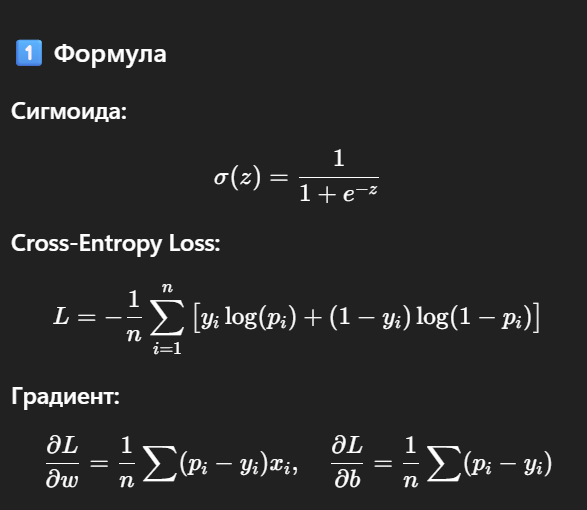

In [36]:
# Данные (простой пример)
X = [0, 1, 2, 3]  # признаки
y = [0, 0, 1, 1]  # метки

# Параметры
w = 0.0
b = 0.0
n = 0.1
epochs = 1000

# 1) Сигмоида
def sigmoid(z):
  return 1 / (1 + math.exp(-z))

# 2) Cross-Entropy Loss
def cross_entropy(y_true, y_pred):
  epsilon = 1e-15
  y_pred = min(max(y_pred, epsilon), 1 - epsilon)
  return -(y_true * math.log(y_pred) + (1 - y_true) * math.log(1 - y_pred))

# Градиентный спуск
for epoch in range(epochs):
    grad_w = 0.0
    grad_b = 0.0
    loss = 0.0
    for xi, yi in zip(X, y):
        z = w * xi + b
        p = sigmoid(z)
        loss += cross_entropy(yi, p)
        grad_w += (p - yi) * xi
        grad_b += (p - yi)
    # усреднение по количеству примеров
    grad_w /= len(X)
    grad_b /= len(X)
    loss /= len(X)

     # обновление параметров
    w -= eta * grad_w
    b -= eta * grad_b

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Итоговые параметры
print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")

Epoch 0: loss = 0.6931, w = 0.0500, b = 0.0000
Epoch 100: loss = 0.3278, w = 1.1919, b = -1.2061
Epoch 200: loss = 0.2363, w = 1.6676, b = -2.0250
Epoch 300: loss = 0.1903, w = 2.0155, b = -2.6034
Epoch 400: loss = 0.1618, w = 2.2941, b = -3.0569
Epoch 500: loss = 0.1419, w = 2.5294, b = -3.4342
Epoch 600: loss = 0.1270, w = 2.7347, b = -3.7598
Epoch 700: loss = 0.1153, w = 2.9178, b = -4.0480
Epoch 800: loss = 0.1058, w = 3.0836, b = -4.3073
Epoch 900: loss = 0.0979, w = 3.2356, b = -4.5438
Final parameters: w = 3.3748, b = -4.7595


### Задача 15. Аналитический вопрос
Ответить письменно:
1. Почему Newton method редко используется в deep learning?
2. Почему gradient descent масштабируется лучше?
3. Как регуляризация влияет на обобщающую способность модели?


1. Ньютон методына екінші ретті туынды керек, ал нейрондық желілерде миллиондаған параметрлерге тым көп ресурс керек, оның үстіне нейрондық желілер әрқашан бір қалыпты функция сияқты бола бермейді

2. Градиентті түсу тек бірінші ретті туындыны қолданады, онымен жұмыс жасағанда барлығын сақтаудың керегі жоқ, оптимизация оңай
3. Регулиризация қателіктің көбеюінің алдын алады, штраф саладые оның мақсаты overfitting азайту

## ⭐ Итоговое задание (Capstone)
### Задача 16. Мини-проект
Реализовать линейную регрессию с нуля:
1. MSE loss
2. Gradient Descent
3. L2 регуляризация
4. График сходимости loss


w = 1.8748, b = 0.3947


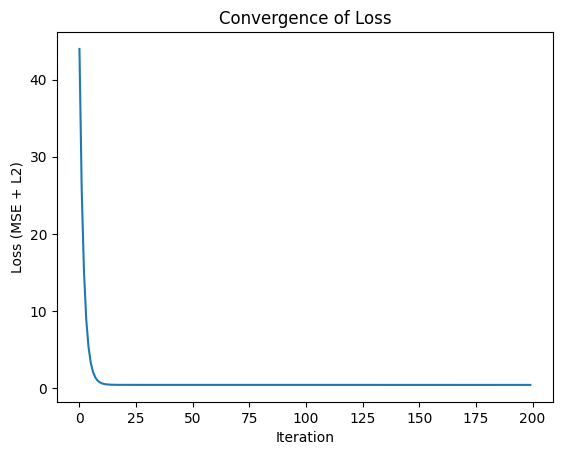

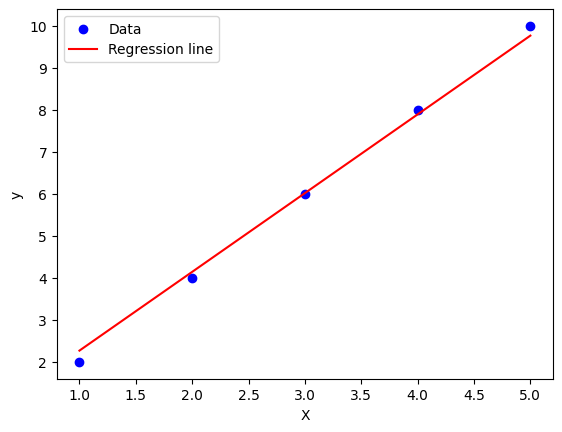

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Данные (пример)
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Параметры
w, b = 0.0, 0.0
eta = 0.01       # learning rate
lambda_ = 0.1    # коэффициент L2
epochs = 200

loss_history = []

# Градиентный спуск
for _ in range(epochs):
    y_pred = w*X + b
    mse = np.mean((y - y_pred)**2)
    loss = mse + lambda_ * w**2
    loss_history.append(loss)

    # Градиенты
    grad_w = (2/len(X)) * np.sum((y_pred - y) * X) + 2*lambda_*w
    grad_b = (2/len(X)) * np.sum(y_pred - y)

    # Обновление параметров
    w -= eta * grad_w
    b -= eta * grad_b

# Итоговые параметры
print(f"w = {w:.4f}, b = {b:.4f}")

# График сходимости
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE + L2)")
plt.title("Convergence of Loss")
plt.show()

# Визуализация линии регрессии
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, w*X + b, color='red', label='Regression line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
